(simon_algorithm)=

# Алгоритм Саймона

Автор(ы):

- [Решетова Карина](https://github.com/Carinetta)
- [Токарев Игорь](https://github.com/polyzer)
- [Сендерович Леонид](https://github.com/flatslm)


## Задача Саймона
Давайте начнём с того, что алгоритм Саймона решает задачу Саймона. Да, вот такой замечательный учёный - нашёл проблему, решил проблему.

По своей природе задача Саймона является разновидностью задачи о скрытой абелевой подгруппе {cite}`lomont2004hidden`.


Пусть задана функция $f: \{0, 1\}^n \rightarrow \{0, 1\}^n$ и **неизвестная** строка $s \in  \{0, 1\}^n$, для всех $x, y \in \{0, 1\}^n$ выполняется:

  $$
    \large f(x) = f(y) \Leftrightarrow x \oplus y = s
  $$

То есть, если мы для двух различных строк $x$ и $y$ имеем одинаковое значение $f(x) = f(y)$, то $x \oplus y$ равняется некоторой неизвестной строке $s$.
Функция $f(x)$ представляет собой чёрный ящик.

Задача состоит в том, чтобы **найти $s$, выполнив при этом как можно меньшее количество вызовов $f(x)$ .**

## Описание алгоритма

Сразу определим операцию на двух бинарных строках (они же бинарные векторы) $x = x_0 x_1 x_2 ... x_{2^n-1}$, $z = z_1 z_2 z_3 ... z_{2^n-1}$:

$$
  \langle x, z\rangle = \bigoplus_{i=0}^{2^n-1} x_i \wedge z_i = x_0 \wedge z_0 \oplus x_1 \wedge z_1 \oplus ... \oplus x_{2^n-1} \wedge z_{2^n-1}
$$

Принципиальная схема алгоритма Саймона:

```{figure} /_static/qcalgo/ru/simon_algorithm/simon_principal.png
:name: simon_principal
:width: 400px
```

В принципе, есть небольшие вариации в реализации алгоритма, мы рассмотрим наиболее простую (все необходимые ссылки в конце приведены):

1. Сначала приготовления. Вначале мы приготовим 2 набора квантовых регистров (каждый размерности $n$) в следующем состоянии:

    $$
      |\psi_0\rangle = |0\rangle|0\rangle
    $$

2. Применяем гейты Адамара на первом регистре:

    $$
      (H^n \otimes I^n) |\psi_0\rangle = (H^n \otimes I^n) |0\rangle |0\rangle = |\psi_1 \rangle = \frac{1}{\sqrt{2^n}}\sum_{x \in \{ 0, 1\}^n}|x\rangle |0\rangle
    $$

3. Применяем оператор $U_f$, который выполняет следующее преобразование $U_f(|x\rangle|0\rangle) = |x\rangle|f(x)\rangle$, т.е. во второй регистр записывается значение функции $f(x)$:

    $$
      U_f(|\psi_1 \rangle) = U_f(\frac{1}{\sqrt{2^n}}\sum_{x \in \{ 0, 1\}^n}|x\rangle |0\rangle) = |\psi_2\rangle = \frac{1}{\sqrt{2^n}}\sum_{x \in \{ 0, 1\}^n}|x\rangle |f(x) \rangle
    $$

4. Производим измерение на втором регистре. Измеренное значение будет соответствовать либо $x$ либо $y = x \oplus s$ . А первый регистр примет значение:

    $$
      |\psi \rangle_3 = \frac{1}{\sqrt{2}} \left( |x\rangle_1 + |y\rangle_1 \right)
    $$

5. Снова применяем гейты Адамара на первом регистре:

    $$
      (H^n \otimes I^n) |\psi_2\rangle = |\psi_3\rangle = \frac{1}{2^n} \sum_{z \in \{ 0, 1\}^n}(-1^{\langle x, z\rangle} + -1^{\langle y, z\rangle}) |z\rangle,
    $$

    (операцию $\langle x, z \rangle$ мы уже определяли выше).

    ```{note}
    Для чисел $x = 110111$ и $z = 010101$ получим

      $$
        \langle x, z\rangle = 1 \wedge 0 \oplus 1 \wedge 1 \oplus 0 \wedge 0 \oplus 1 \wedge 1 \oplus 1 \wedge 0 \oplus 1 \wedge 1 = 1
      $$

      $$
        (-1)^{1} = -1
      $$
    ```

6. Производим измерение на первом регистре. И здесь возможны 2 варианта исхода:

    1. $ x \oplus y = s = 0^n $

        Учитывая $ x \oplus y = 0^n $ и то, что состояние всей системы описывается как

        $$
          \sum_{z \in \{0, 1\}^n}|z\rangle \otimes \frac{1}{2^n} \sum_{x \in \{0, 1\}^n}(-1^{\langle x, z\rangle}) |f(x) \rangle
        $$

        находим вероятность получить строку $z$ на первом регистре

        $$
          p_z = \left\| \frac{1}{2^n} \sum_{z \in \{0, 1\}^n} \left((-1)^{\langle z, x\rangle} |f(x)\rangle \right) \right\|^2 = \frac{1}{2^n}
        $$

        т.е. в данном случае имеет место **равномерное распределение**.

    2. $ x \oplus y = s \neq 0^n $

        Этот случай гораздо интереснее. Функция $f$ преобразует два различных входных значения $x_1, x_2 \in \{0,1\}^n$ в одно $f(x_1) = f(x_2) = s \in \{0, 1\}^n$ .
        Также $x_1 \oplus x_2 = s$ эквивалентно $x_1 \oplus s = x_2$.

        $$
          |\psi_3\rangle = \frac{1}{2^n}\sum_{z \in \{0, 1 \}^n}\sum_{x \in \{0, 1 \}^n} \frac{(-1)^{\langle z, x \rangle} (1 + (-1)^{\langle z, s\rangle})}{2} |z\rangle \oplus |f(x)\rangle=
        $$

        $$
          \frac{1}{2^n}\sum_{z \in \{0, 1 \}^n}|z\rangle \otimes \sum_{x \in \{0, 1 \}^n} \frac{(-1)^{\langle z,  x\rangle} (1 + (-1)^{\langle z, s\rangle})}{2} |f(x)\rangle
        $$

        $$
          p_z = \left\| \frac{1}{2^n} \sum_{x \in \{0, 1\}^n} \left((-1)^{\langle x, z\rangle} |f(x)\rangle \right) \right\|^2 =
        \left\| \frac{1}{2^n} \sum_{z \in A} \left(((-1)^{\langle x_1, z\rangle} + (-1)^{\langle x_2, z\rangle})|z\rangle \right) \right\|^2
        $$

        $$
        = \begin{cases}
            \frac{1}{2^{n-1}}, \text{ если } \langle z, s \rangle = 0 \\
            0, \text{ если }  \langle z, s \rangle = 1
          \end{cases}
        $$

    Расчёты вероятностей можно найти в приложениях [Приложение 1](simon_algorithm.html#id6).

    Выполняем алгоритм $n$ раз. После чего у нас будет система $n$ линейно независимых уравнений. Теперь приступаем к вычислению строки $s$.

7. Постобработка.

    Итак, для того, чтобы найти $s = (s_0, s_1, s_2, ..., s_{n-1})^T$, нам потребуется $n$ линейно независимых векторов $\vec{z_i}$, для которых выполняется $\langle \vec{z_i}, s \rangle = 0$.

    После того как получена система из $n$ линейно независимых уравнений, решение можно найти методом Гаусса.

## Пример

Давайте возьмём n = 3, строку $s = 100$, и функцию $f$, которая соответствует критерию

$$
  f(x) = f(y) \Leftrightarrow x \oplus s = y
$$

Обычно функция $f(x)$ задана наперёд. Ну а мы выберем её простейшей: $f(x) = x \oplus s$.

Давайте посмотрим на таблицу истинности всех нужных переменных.

$$
  \large
  \begin{array} {|r|r|r|}
  \hline x & x \oplus s & f(x) \\
  \hline 000 & 100 & 000 \\
  \hline 001 & 101 & 001 \\
  \hline 010 & 110 & 010 \\
  \hline 011 & 111 & 011 \\
  \hline 100 & 000 & 000 \\
  \hline 101 & 001 & 001 \\
  \hline 110 & 010 & 010 \\
  \hline 111 & 011 & 011 \\
  \hline  
  \end{array}
$$

Нарисуем схему на Qiskit, которая будет показывать одну итерацию алгоритма:

In [1]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister


# Работаем в пространстве размерности n = 3
n = 3

# Создаём необходимые регистры
qr1 = QuantumRegister(n, name="q1")
qr2 = QuantumRegister(n, name="q2")
cr1 = ClassicalRegister(n, name="c1")

# Шаг 1. Создаём квантовую схему (инициализация состояния)
qc = QuantumCircuit(qr1, qr2, cr1)

# Шаг 2. Применяем гейт Адамара ко всем кубитам первого регистра
qc.h(range(n))

# Шаг 3. Применяем U_f
qc.cx(qr1[0], qr2[0])

# Шаг 4. Производим измерение второго регистра
qc.measure(qr2, cr1)

# Шаг 5. Ещё раз применяем гейт адамара к каждому из кубитов
qc.h(range(n))

# Шаг 6. Производим измерение первого регистра
qc.measure(qr1, cr1)

# Рисуем схему
qc.draw()

┌───┐     ┌───┐      ┌─┐
q1_0: ┤ H ├──■──┤ H ├──────┤M├
      ├───┤  │  ├───┤┌─┐   └╥┘
q1_1: ┤ H ├──┼──┤ H ├┤M├────╫─
      ├───┤  │  ├───┤└╥┘┌─┐ ║ 
q1_2: ┤ H ├──┼──┤ H ├─╫─┤M├─╫─
      └───┘┌─┴─┐└┬─┬┘ ║ └╥┘ ║ 
q2_0: ─────┤ X ├─┤M├──╫──╫──╫─
       ┌─┐ └───┘ └╥┘  ║  ║  ║ 
q2_1: ─┤M├────────╫───╫──╫──╫─
       └╥┘  ┌─┐   ║   ║  ║  ║ 
q2_2: ──╫───┤M├───╫───╫──╫──╫─
        ║   └╥┘   ║   ║  ║  ║ 
c1: 3/══╩════╩════╩═══╩══╩══╩═
        1    2    0   1  2  0

При использовании Pennylane схема выглядит следующим образом:

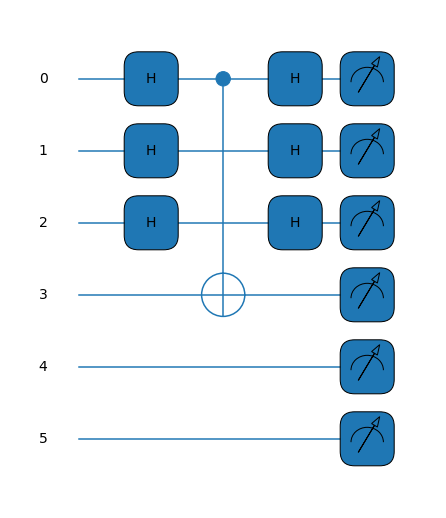

In [2]:
import pennylane as qml
import matplotlib.pyplot as plt
from typing import Tuple, List


n = 3

dev = qml.device("default.qubit", shots=128, wires=n*2)

def simon_start(N: int) -> None:
  for i in range(N):
    qml.Hadamard(wires=i)

def simon_oracle(N: int) -> None:
  qml.CNOT(wires=[0, N])

def simon_after_oracle(N: int) -> None:
  for i in range(N):
    qml.Hadamard(wires=i)


@qml.qnode(dev)
def simon_circuit(N: int) -> Tuple[List[List[int]], List[List[int]]]:
  simon_start(N)
  simon_oracle(N)
  simon_after_oracle(N)

  wx = range(0, N)
  wfx = range(N, N*2)

  return qml.sample(wires=wx), qml.sample(wires=wfx)

# Схема возвращает массив результатов измерений первого
# регистра: x, и массив результатов измерения 2-го регистра: f(x).
# количестов измерений (samples) задано через shots
x, fx = simon_circuit(N=n)

fig, ax = qml.draw_mpl(simon_circuit)(N=n)
fig.show()

```{note}
Созданная с помощью Pennylane схема визуально отличается от полученной с помощью Qiskit, так как Pennylane не позволяет выполнять операции с кубитами после выполнения измерения. Но так как с кубитами Y ([3, 4, 5]) после операции измерения не должно выполняться никаких действий, результат получается тот же самый.
```

Теперь пройдём по всем шагам алгоритма:

1. Инициализация всех регистров в $0$ состоянии:

    $$
      |\psi_0\rangle = |000\rangle_{1} |000\rangle_{2}
    $$

2. Применяем Адамар к первому регистру:

    $$
      (H^n \otimes I)(|\psi_0\rangle) = |\psi_1\rangle = \frac{1}{\sqrt{8}}(|000\rangle + |001\rangle + |010\rangle + |011\rangle \\ + |100\rangle + |101\rangle + |110\rangle + |111\rangle)_1 |000 \rangle_{2})
    $$

3. Применяем оракул $U_f$:

    $$
      U_f(|\psi_1\rangle = |\psi_2\rangle = \\

      \frac{1}{\sqrt{8}} (|000\rangle_{1} |0 \oplus 0, 0, 0 \rangle_{2} \\
      + |001\rangle_{1} |0 \oplus 0, 0, 0 \rangle_{2} \\
      + |010\rangle_{1} |0 \oplus 0, 0, 0 \rangle_{2} \\
      + |011\rangle_{1} |0 \oplus 0, 0, 0 \rangle_{2} \\
      + |100\rangle_{1} |0 \oplus 1, 0, 0 \rangle_{2} \\
      + |101\rangle_{1} |0 \oplus 1, 0, 0 \rangle_{2} \\
      + |110\rangle_{1} |0 \oplus 1, 0, 0 \rangle_{2} \\
      + |111\rangle_{1} |0 \oplus 1, 0, 0 \rangle_{2} )
    $$

4. Измеряем второй регистр. С вероятностью $\frac{1}{2}$ мы получим либо значение $|000\rangle$ либо $|100\rangle$. Допустим результат равен $|100\rangle$. Тогда состояние первого регистра примет вид: $|\psi_3\rangle = (|100\rangle_{1} + |101\rangle_{1} + |110\rangle_{1} + |111\rangle_{1})$.

5. Ещё один раз применяем гейты Адамара на первый регистр:

    $$
      |\psi_4 \rangle = \frac{1}{4} [ \left(|0\rangle - |1\rangle) \otimes (|0\rangle + |1\rangle) \otimes (|0\rangle + |1\rangle) \right)
    $$
    $$
      + \left(|0\rangle - |1\rangle) \otimes (|0\rangle + |1\rangle) \otimes (|0\rangle - |1\rangle) \right)
    $$
    $$
      + \left(|0\rangle - |1\rangle) \otimes (|0\rangle - |1\rangle) \otimes (|0\rangle + |1\rangle) \right)
    $$
    $$
      + \left(|0\rangle - |1\rangle) \otimes (|0\rangle - |1\rangle) \otimes (|0\rangle - |1\rangle) \right) ]
    $$

6. Производим измерение первого регистра, записывая результат.

    Выполняем шаги 1-6 $n$ раз.

7. Здесь решаем систему уравнений.

## Приложение

1. Расчёт вероятностей.

    1. Случай, когда $x \oplus z = 0^n$ :

        $$
          \sum_{z \in \{0,1\}^n} |z\rangle \otimes \left( \frac{1}{2^n} \sum_{x \in \{0,1\}^n} ((-1)^{\langle x, z \rangle} |f(x)\rangle) \right)
        $$

        Вероятность получить какую-либо из $2^n$ строк одинакова:

        $$
          p_z = \left\| \frac{1}{2^n} \sum_{z \in \{0, 1\}^n} \left((-1)^{\langle z, x\rangle} |f(x)\rangle \right) \right\|^2 = \frac{1}{2^n}
        $$

        Утверждение, данное выше, следует из того, что $f(x)$ отличается от $x$ лишь порядком во всём множестве строк $\{0,1\}^n$:  

        $$
          \left\| \frac{1}{2^n} \sum_{z \in \{0, 1\}^n} \left((-1)^{\langle z, x\rangle} |f(x)\rangle \right) \right\|^2 = \left\| \frac{1}{2^n} \sum_{z \in \{0, 1\}^n} \left((-1)^{\langle z, x\rangle} |x\rangle \right) \right\|^2
        $$

    2. Случай, когда $x \oplus z = s \neq 0^n$:

        Определим $A = f(\{0,1\}^n)$ - образ функции $f$, $f(x_i) = \ell \in A$ - т.е. это какое-то значение функции $f$. Здесь у нас имеются два таких значения $x_1 \in \{0, 1\}^n $, $x_2 \in \{0, 1\}^n $ , что для них выполняется $ x_2 = s \oplus x_1 $.

        $$
          p_z = \left\| \frac{1}{2^n} \sum_{\ell \in A} \left( ((-1)^{\langle z, x_1\rangle} + (-1)^{\langle z, x_2\rangle}) |\ell\rangle \right) \right\|^2 = \frac{1}{2^n}
        $$

        Перепишем коэффициенты $(-1)^{\langle x_1, z \rangle} + (-1)^{\langle x_2, z \rangle}$:

        $$
          (-1)^{\langle x_1, z \rangle} + (-1)^{\langle x_2, z \rangle} = (-1)^{\langle x_1, z \rangle} + (-1)^{\langle x_2 \oplus s, z \rangle}
        $$

        Также, заметим, что выполняется $\langle x_1 \oplus s, z \rangle = \langle x_1, z \rangle \oplus \langle x_2, z \rangle$, тогда ещё раз перепишем:

        $$
          (-1)^{\langle x_1, z \rangle} (1 + (-1)^{\langle z, s \rangle})
        $$

        И собирая все полученные условия:

        $$
           p_z = \left\| \frac{1}{2^n} \sum_{\ell \in A} \left( (-1)^{\langle x_1, z \rangle} (1 + (-1)^{\langle z, s \rangle}) |\ell\rangle \right) \right\|^2 = \frac{1}{2^n}
        $$

        Если $\langle z, s \rangle = 1$, то $(-1)^{\langle z, s \rangle} = -1$ и следовательно

        $$
          (-1)^{\langle x_1, z \rangle} (1 + (-1)^{\langle z, s \rangle}) = (-1)^{\langle x_1, z \rangle} (1 - 1) = 0
        $$

        И вероятность в таком случае равняется 0

        $$
          p_z = \left\| \frac{1}{2^n} \sum_{\ell \in A} \left( (-1)^{\langle x_1, z \rangle} (1 + (-1)^{\langle z, s \rangle}) |\ell\rangle \right) \right\|^2 = 0
        $$

        Иначе $\langle z, s \rangle = 0$, и тогда $(-1)^{\langle z, s \rangle} = 1$:

        $$
          (-1)^{\langle x_1, z \rangle} (1 + (-1)^{\langle z, s \rangle}) = 2 (-1)^{\langle x_1, z \rangle}
        $$

        Вычисление вероятности

        $$
          p_z = \left\| \frac{1}{2^n} \sum_{\ell \in A} (-1)^{\langle x_1, z \rangle} 2 |\ell\rangle \right\|^2 =
        $$

        $$
          \left\| \frac{2}{2^n} \sum_{\ell \in A} (-1)^{\langle x_1, z \rangle} |\ell\rangle \right\|^2 = \left\| \frac{2}{2^n} \sum_{\ell \in A} (-1)^{\langle x_1, z \rangle} |\ell\rangle \right\|^2 = \left\| \frac{1}{2^{n-1}} \sum_{\ell \in A} (-1)^{\langle x_1, z \rangle} |\ell\rangle \right\|^2
        $$

        $$
          p_z = \begin{cases}
            \frac{1}{2^{n-1}}, \text{ если } \langle z, s \rangle = 0 \\
            0, \text{ если }  \langle z, s \rangle = 1
          \end{cases}
        $$

## Ссылки

- [Simon Algorithm](https://leimao.github.io/blog/Simon-Algorithm/)
- [Simon's problem](https://en.wikipedia.org/wiki/Simon%27s_problem)
- [Qiskit Simon algorithm](https://qiskit.org/textbook/ch-algorithms/simon.html)